# K-means clusting

## import libarries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import dataset

In [3]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## create model and import libarries

In [4]:
from sklearn.cluster  import KMeans
from sklearn.preprocessing import StandardScaler

# create into data
X=df[['age','fare']]
# remove nan  values
X.age.fillna(value=X['age'].mean(),inplace=True)


C:\Users\muhammad waseem\AppData\Local\Temp\ipykernel_3312\2010017881.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.age.fillna(value=X['age'].mean(),inplace=True)
C:\Users\muhammad waseem\AppData\Local\Temp\ipykernel_3312\2010017881.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(value=X['age'].mean(),inplace=True)


### scalar data

In [5]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

### now checked

In [6]:
X.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [7]:
X.isnull().sum()

age     0
fare    0
dtype: int64

In [8]:
X_scaled

array([[-0.5924806 , -0.50244517],
       [ 0.63878901,  0.78684529],
       [-0.2846632 , -0.48885426],
       ...,
       [ 0.        , -0.17626324],
       [-0.2846632 , -0.04438104],
       [ 0.17706291, -0.49237783]])

# perform clusting

In [9]:
model=KMeans(n_clusters=3)
model.fit(X_scaled)

KMeans(n_clusters=3)

### assign cluster lables  in a data

In [10]:
df['cluster']=model.labels_

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


cluster are put in your data by means of age and fare

In [12]:
df['cluster'].unique()

array([0, 2, 1], dtype=int32)

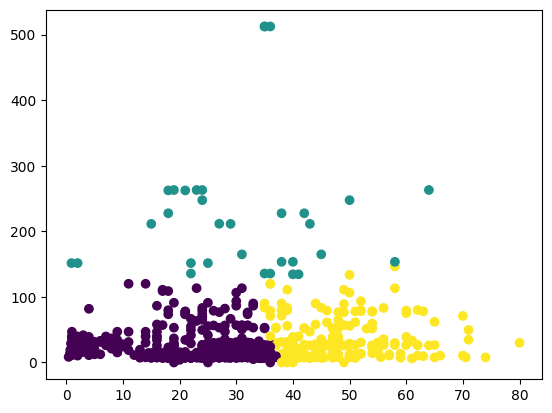

In [13]:
plt.scatter(df['age'],df['fare'],c=df['cluster'])
plt.show()

In [14]:
import plotly.express as  px
fig=px.scatter_3d(df,x='age',y='fare',z='pclass',color='cluster')
fig.show()


In [15]:
fig=px.scatter(df,x='age',y='fare',color='cluster')
fig.show()

In [16]:
fig=px.parallel_coordinates(df,color='cluster')
fig.show()